In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import emoji
from gensim.models import Word2Vec
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from scipy import stats
import statsmodels.api as sm

In [2]:
pip install emoji

  Obtaining dependency information for emoji from https://files.pythonhosted.org/packages/e6/90/20ad30babfa8f2b5ab46281d8e17bdfdbb3ac294cda14d525b9c2d958846/emoji-2.12.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/431.4 kB ? eta -:--:--
    --------------------------------------- 10.2/431.4 kB ? eta -:--:--
   ------------- -------------------------- 143.4/431.4 kB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 431.4/431.4 kB 3.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to C:\Users\pa
[nltk_data]     kumaran\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to C:\Users\pa
[nltk_data]     kumaran\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to C:\Users\pa
[nltk_data]     kumaran\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to C:\Users\pa
[nltk_data]     kumaran\AppData\Roaming\nltk_data...


True

In [6]:
df1 = pd.read_csv("emotion-labels-train.csv")
df2 = pd.read_csv("emotion-labels-test.csv")
df3 = pd.read_csv("emotion-labels-val.csv")

In [7]:
df1.head()

,text,label
0,Just got back from seeing @GaryDelaney in Burs...,joy
1,Oh dear an evening of absolute hilarity I don'...,joy
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy
4,I feel so blessed to work with the family that...,joy


In [8]:
df2.head()

,text,label
0,You must be knowing #blithe means (adj.) Happ...,joy
1,Old saying 'A #smile shared is one gained for ...,joy
2,Bridget Jones' Baby was bloody hilarious 😅 #Br...,joy
3,@Elaminova sparkling water makes your life spa...,joy
4,I'm tired of everybody telling me to chill out...,joy


In [9]:
df3.head()

,text,label
0,"@theclobra lol I thought maybe, couldn't decid...",joy
1,Nawaz Sharif is getting more funnier than @kap...,joy
2,Nawaz Sharif is getting more funnier than @kap...,joy
3,@tomderivan73 😁...I'll just people watch and e...,joy
4,I love my family so much #lucky #grateful #sma...,joy


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3613 entries, 0 to 3612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3613 non-null   object
 1   label   3613 non-null   object
dtypes: object(2)
memory usage: 56.6+ KB


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3142 non-null   object
 1   label   3142 non-null   object
dtypes: object(2)
memory usage: 49.2+ KB


In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    347 non-null    object
 1   label   347 non-null    object
dtypes: object(2)
memory usage: 5.6+ KB


In [13]:
df1.describe()

,text,label
count,3613,3613
unique,3565,4
top,i love the word fret so much and im in heaven,fear
freq,2,1147


In [14]:
df2.describe()

,text,label
count,3142,3142
unique,3099,4
top,"@ShannonBeador we know the truth about her, th...",fear
freq,2,995


In [15]:
df3.describe()

,text,label
count,347,347
unique,342,4
top,"@DxfyingGrxvity - frustration, looking up at E...",fear
freq,2,110


In [16]:
# Checking whether there are NULL values

print("Number of NULL values in the training set: ")
print(df1.isnull().sum())
print("Number of NULL values in the test set: ")
print(df2.isnull().sum())
print("Number of NULL values in the validation set: ")
print(df3.isnull().sum())

Number of NULL values in the training set: 
text     0
label    0
dtype: int64
Number of NULL values in the test set: 
text     0
label    0
dtype: int64
Number of NULL values in the validation set: 
text     0
label    0
dtype: int64


In [17]:
# Deleting possible duplicates

df1.drop(df1[df1.duplicated()].index, axis=0, inplace=True)
df2.drop(df2[df2.duplicated()].index, axis=0, inplace=True)
df3.drop(df3[df3.duplicated()].index, axis=0, inplace=True)

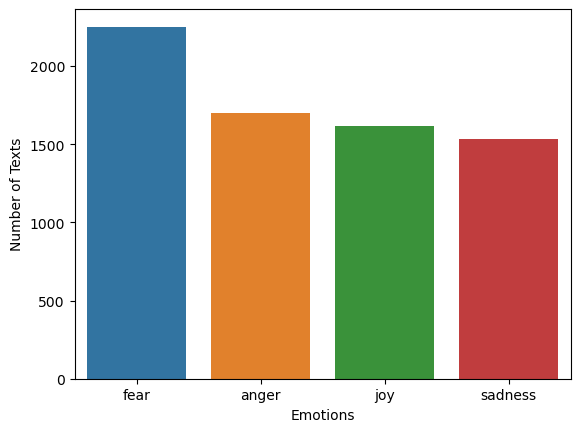

In [18]:
# Concatenating DFs for a better visualisation
combined_df = pd.concat([df1, df2, df3])
label_counts = combined_df['label'].value_counts()

# Countplot
sns.countplot(x='label', data=combined_df, order=combined_df['label'].value_counts().index)
plt.xlabel('Emotions')
plt.ylabel('Number of Texts')
plt.show()

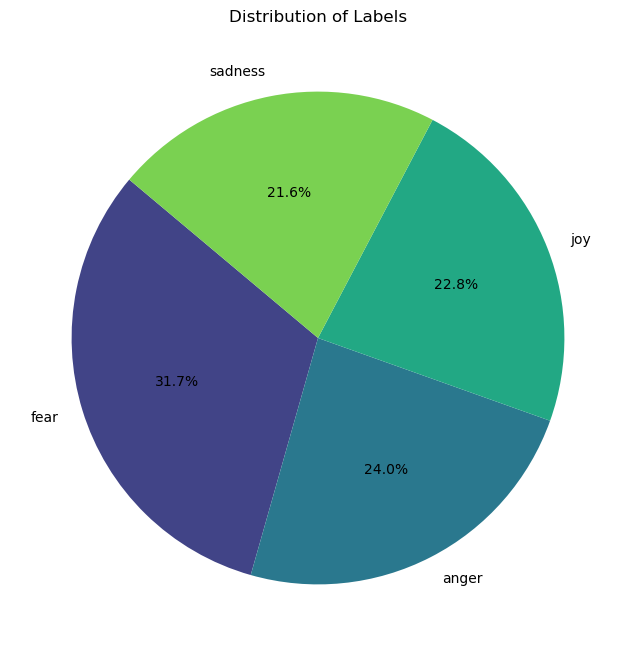

In [19]:
# A piechart for understanding the proportion
plt.figure(figsize=(8, 8))
plt.pie(combined_df['label'].value_counts().values, labels=combined_df['label'].value_counts().index, autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette('viridis', len(combined_df['label'].value_counts().index)))
plt.title('Distribution of Labels')
plt.show()


In [20]:
data = pd.concat([df1, df2, df3], ignore_index=True)

In [21]:
data.head()

,text,label
0,Just got back from seeing @GaryDelaney in Burs...,joy
1,Oh dear an evening of absolute hilarity I don'...,joy
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy
4,I feel so blessed to work with the family that...,joy


In [43]:
from sklearn.preprocessing import OrdinalEncoder


In [48]:
encoder = OrdinalEncoder(categories=[['joy','anger','fear','sadness']])
df1.label = encoder.fit_transform(df1[['label']])
df1.head(5)

,text,label
0,Just got back from seeing @GaryDelaney in Burs...,0.0
1,Oh dear an evening of absolute hilarity I don'...,0.0
2,Been waiting all week for this game ❤️❤️❤️ #ch...,0.0
3,"@gardiner_love : Thank you so much, Gloria! Yo...",0.0
4,I feel so blessed to work with the family that...,0.0


In [51]:
df2.label = encoder.fit_transform(df2[['label']])


ValueError: could not convert string to float: 'joy'

In [52]:
df2.label.value_counts()

label
2.0    995
1.0    760
0.0    714
3.0    673
Name: count, dtype: int64

In [53]:
df3.label = encoder.fit_transform(df3[['label']])
df3.label.value_counts()

label
2.0    110
1.0     84
0.0     79
3.0     74
Name: count, dtype: int64

In [57]:
# Normality test (Shapiro-Wilk Test)
print("\nNormality Tests (Shapiro-Wilk Test):")

stat, p = stats.shapiro(df1['label'].dropna())
print(f'Train {df1.columns[1]}: Statistics={stat}, p={p}')
stat, p = stats.shapiro(df2['label'].dropna())
print(f'Test {df1.columns[1]}: Statistics={stat}, p={p}')
stat, p = stats.shapiro(df3['label'].dropna())
print(f'Eval {df1.columns[1]}: Statistics={stat}, p={p}')

# Homogeneity of variance (Levene's Test)
print("\nHomogeneity of Variance (Levene's Test):")

stat, p = stats.levene(df1['label'], df2['label'], df3['label'])
print(f'{df1.columns[1]}: Statistics={stat}, p={p}')

# Comparative statistics (ANOVA)
print("\nComparative Statistics (ANOVA):")

f_stat, p_val = stats.f_oneway(df1['label'], df2['label'], df3['label'])
print(f'{df1.columns[1]}: F-statistic={f_stat}, p-value={p_val}')



Normality Tests (Shapiro-Wilk Test):
Train label: Statistics=0.8659237027168274, p=0.0
Test label: Statistics=0.8669371008872986, p=1.401298464324817e-45
Eval label: Statistics=0.8667654991149902, p=1.0665003088535226e-16

Homogeneity of Variance (Levene's Test):
label: Statistics=0.00010790230414304125, p=0.9998921035189553

Comparative Statistics (ANOVA):
label: F-statistic=0.04038742957671376, p-value=0.9604174936801664


In [22]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to C:\Users\pa
[nltk_data]     kumaran\AppData\Roaming\nltk_data...


True

In [58]:
sia = SentimentIntensityAnalyzer()

In [59]:
sentiments = []
for text in data['text']:
    sentiment = sia.polarity_scores(text)
    sentiments.append(sentiment)

In [60]:
sentiment_labels = []
for sentiment in sentiments:
    compound_score = sentiment['compound']
    if compound_score >= 0.05:
        sentiment_labels.append('Positive')
    elif compound_score <= -0.05:
        sentiment_labels.append('Negative')
    else:
        sentiment_labels.append('Neutral')

In [61]:
# Add the sentiment labels to the DataFrame
data['sentiment'] = sentiment_labels

In [62]:
data[['text', 'sentiment', 'label']].head(10)

,text,sentiment,label
0,Just got back from seeing @GaryDelaney in Burs...,Positive,joy
1,Oh dear an evening of absolute hilarity I don'...,Positive,joy
2,Been waiting all week for this game ❤️❤️❤️ #ch...,Neutral,joy
3,"@gardiner_love : Thank you so much, Gloria! Yo...",Positive,joy
4,I feel so blessed to work with the family that...,Positive,joy
5,"Today I reached 1000 subscribers on YT!! , #go...",Positive,joy
6,"@Singaholic121 Good morning, love! Happy first...",Positive,joy
7,#BridgetJonesBaby is the best thing I've seen ...,Positive,joy
8,Just got back from seeing @GaryDelaney in Burs...,Positive,joy
9,@IndyMN I thought the holidays could not get a...,Positive,joy


In [63]:
data.head()

,text,label,sentiment
0,Just got back from seeing @GaryDelaney in Burs...,joy,Positive
1,Oh dear an evening of absolute hilarity I don'...,joy,Positive
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy,Neutral
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy,Positive
4,I feel so blessed to work with the family that...,joy,Positive


In [64]:
from sklearn.model_selection import train_test_split
X = data[['text','sentiment']]
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train['sentiment'] = le.fit_transform(X_train['sentiment'])
X_test['sentiment'] = le.fit_transform(X_test['sentiment'])

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train['text'])
X_test_tfidf = vectorizer.transform(X_test['text'])

In [66]:
model = SVC()
model.fit(X_train_tfidf, y_train)

SVC()

In [67]:
y_pred = model.predict(X_test_tfidf)

In [68]:
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8465869106263195
Classification Report:
              precision    recall  f1-score   support

       anger       0.85      0.83      0.84       327
        fear       0.79      0.94      0.86       432
         joy       0.96      0.87      0.91       352
     sadness       0.83      0.71      0.77       310

    accuracy                           0.85      1421
   macro avg       0.86      0.84      0.84      1421
weighted avg       0.85      0.85      0.85      1421



In [69]:
def predict_sentiment(text):
    text_tfidf = vectorizer.transform([text])
    sentiment = model.predict(text_tfidf)
    return sentiment[0]

In [70]:
new_review = "Im happy"
predicted_sentiment = predict_sentiment(new_review)
print("Predicted sentiment:", predicted_sentiment)

Predicted sentiment: joy


In [71]:
new_review = "Im feel confussed "
predicted_sentiment = predict_sentiment(new_review)
print("Predicted sentiment:", predicted_sentiment)

Predicted sentiment: sadness


In [72]:
new_review = "I hate all "
predicted_sentiment = predict_sentiment(new_review)
print("Predicted sentiment:", predicted_sentiment)

Predicted sentiment: anger
